In [3]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("abisee/cnn_dailymail", "1.0.0")

/opt/anaconda3/envs/css_formatives_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### EDA (on training set)

In [18]:

df = ds['train'].to_pandas()


In [19]:
df.head(40)

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
5,"BAGHDAD, Iraq (CNN) -- Dressed in a Superman s...","Parents beam with pride, can't stop from smili...",a1ebb8bb4d370a1fdf28769206d572be60642d70
6,"BAGHDAD, Iraq (CNN) -- The women are too afrai...","Aid workers: Violence, increased cost of livin...",7c0e61ac829a3b3b653e2e3e7536cc4881d1f264
7,"BOGOTA, Colombia (CNN) -- A key rebel commande...",Tomas Medina Caracas was a fugitive from a U.S...,f0d73bdab711763e745cdc75850861c9018f235d
8,WASHINGTON (CNN) -- White House press secretar...,"President Bush says Tony Snow ""will battle can...",5e22bbfc7232418b8d2dd646b952e404df5bd048
9,(CNN) -- Police and FBI agents are investigati...,Empty anti-tank weapon turns up in front of Ne...,613d6311ec2c1985bd44707d1796d275452fe156


In [6]:
df.info

<bound method DataFrame.info of                                                   article  \
0       LONDON, England (Reuters) -- Harry Potter star...   
1       Editor's note: In our Behind the Scenes series...   
2       MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...   
3       WASHINGTON (CNN) -- Doctors removed five small...   
4       (CNN)  -- The National Football League has ind...   
...                                                   ...   
287108  The nine-year-old daughter of a black, unarmed...   
287109  Legalising assisted suicide is a slippery slop...   
287110  A group calling itself 'The Women of the 99 Pe...   
287111  Most men enjoy a good pint of lager or real al...   
287112  A Facebook page seeking to preserve the 'Black...   

                                               highlights  \
0       Harry Potter star Daniel Radcliffe gets £20M f...   
1       Mentally ill inmates in Miami are housed on th...   
2       NEW: "I thought I was going to die," driver 

### Null checking

In [7]:
print(df.isnull().sum())

article       0
highlights    0
id            0
dtype: int64


### Word lenght

In [8]:
df["article_len"] = df["article"].apply(lambda x: len(str(x).split()))
df["high_len"] = df["highlights"].apply(lambda x: len(str(x).split()))

df[["article_len", "high_len"]].describe()


,article_len,high_len
count,287113.000000,287113.000000
mean,691.870326,51.574101
std,336.500292,21.256336
min,8.000000,4.000000
25%,443.000000,38.000000
50%,632.000000,48.000000
75%,877.000000,60.000000
max,2347.000000,1296.000000


In [9]:
#Most frequent hihglight lenght
mode_length = df["high_len"].mode()
print(mode_length.values)


[38]


Articles:
- average word lenght is around 692 words
- minimum points to 8 (possible outlier) and maximum 2347 words

Highlights:
- average highlight is 51 words long
- shortest has 4 words and longest 1296 words (possible outlier)

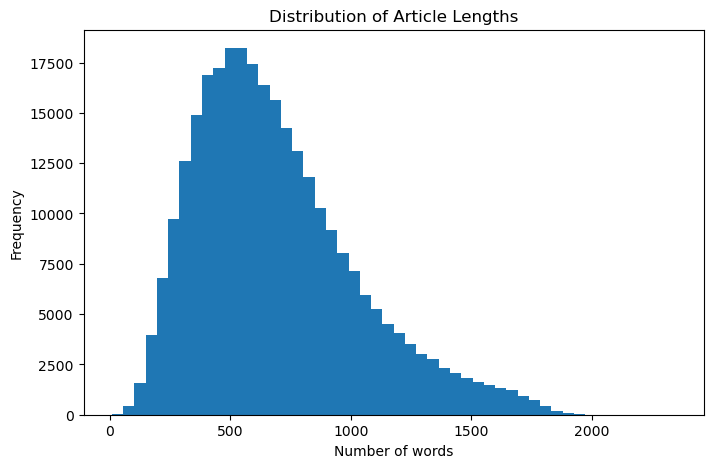

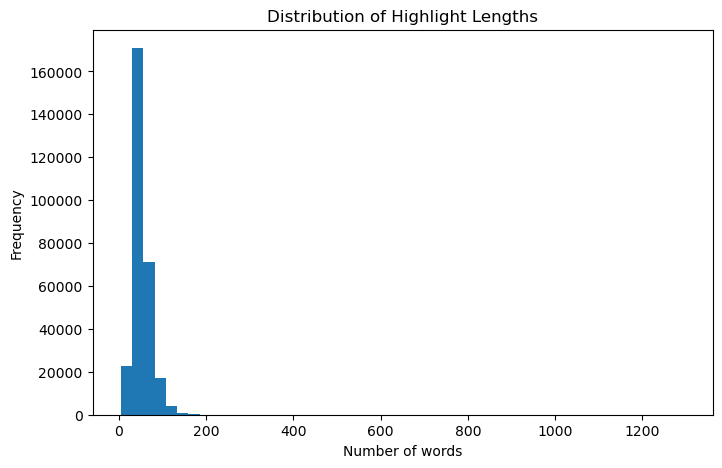

In [10]:
import matplotlib.pyplot as plt

# Article length
plt.figure(figsize=(8,5))
plt.hist(df["article_len"], bins=50)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

# Summary length
plt.figure(figsize=(8,5))
plt.hist(df["high_len"], bins=50)
plt.title("Distribution of Highlight Lengths")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


### Interpetation:
Artcle lenght:
- distribution is right skewed, most arrticles are medium lenght

Highlight lenght:
- dsitrbutuion is right skewed,
- standard highlight lenght: 38 words
- outliers if above point around 170/200

### Inspection of longest and shortest articles and hihglights

### Shortest article

In [9]:
shortest_article = df.loc[df["article_len"].idxmin()]
print(shortest_article["article"])
print(shortest_article["highlights"])


Downton Abbey's famously grim butler, Mr Bates .
And now for the good news . . . Following a particularly grim week, here’s a compendium of some of the world’s most comforting headlines: . Supermodel Smiles On Catwalk . Jack Russell Dog Welcomes Stranger . Child At Funfair ‘Delighted’ By Goldfish . Katie Price Breasts ‘Roughly Same Size As Last Week’ Say Experts . Teenager Looks Up From Phone, Greets Parent . Political Pundits Agree To Stop Discussing Hung Parliament For Next Three Months . Diner Finishes His Curly Kale . Pensioner Looks Great In Party Hat . Celebrity Fails To Compare Life To Roller-coaster . Pet Hamster Repays Child’s Affection . ‘Cheer Up, It May Never Happen’ — Downton’s Mr Bates Enjoys Belly-laugh . Style Journalist Fails To Employ The Word ‘Iconic’ Sally Bercow Goes Out On Town, Retains Dignity . Entire Windfarm Operates According To Plan . Miley Cyrus Feels A Bit Chilly, Opts For Extra Layer .


The shortest article seems like an outlier, moreover inspection of the highlight shows stylistically incoherent text, that suggested multiple bullet points were merged into a one summary. 

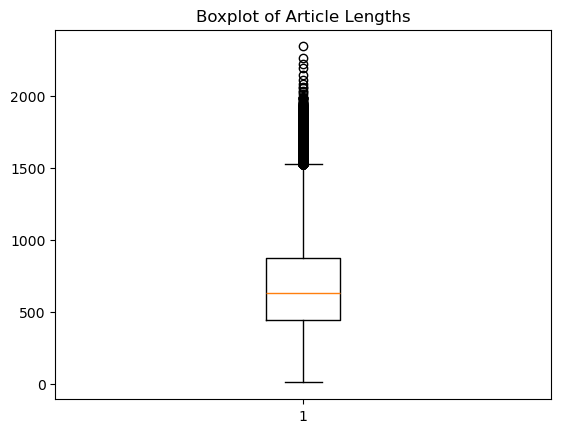

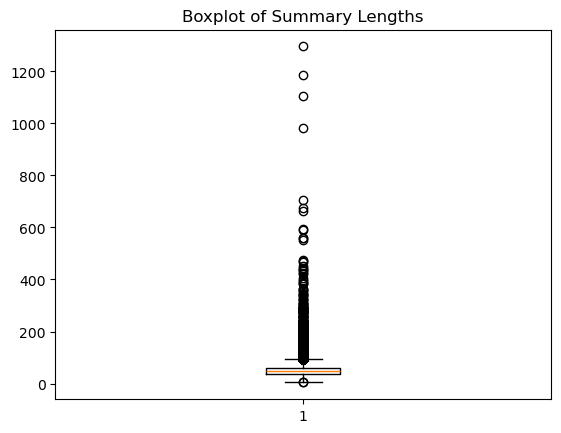

In [11]:
plt.boxplot(df["article_len"])
plt.title("Boxplot of Article Lengths")
plt.show()

plt.boxplot(df["high_len"])
plt.title("Boxplot of Summary Lengths")
plt.show()


### Longest articles

In [12]:
longest_article = df.loc[df["article_len"].idxmax()]
print(longest_article["article"])
print(longest_article["highlights"])


Taylor Swift has won hundreds of awards, but she'll likely never forget her 2009 Best Female Video at the MTV Video Music Awards. Rapper Kanye West rushed the stage, stealing the microphone from the unsuspecting singer and insisting fellow nominee Beyonce had 'one of the best videos of all time.' However, six years later the two seemed chummy as they posed backstage at the 57th Grammy Awards in Los Angeles. Scroll down for video . Reconciled: It looks like all is good between Kanye West (L) and Taylor Swift (R) after the former infamously interrupted the singer's MTV VMA acceptance speech . Bad Blood: Taylor was taken by surprise when Kanye rushed the stage back in 2009 when she won Best Female Video . In one shot, the unlikely duo appear to be engaged in a handshake, as they both sport wide grins, which is also unusual for Kanye. The pair were also spotted posing together, standing close as both sported large smiles for the cameras. This comes as a surprise after the shocking interrup

- multiple types of content mixed together, captions, descriptions, promotions
- all text scrapped from a webpage

### Shortest highlight

In [13]:
shortest_summary = df.loc[df["high_len"].idxmin()]
print(shortest_summary["article"])
print(shortest_summary["highlights"])

By . Leah Simpson . PUBLISHED: . 16:46 EST, 19 July 2012 . | . UPDATED: . 02:31 EST, 20 July 2012 . With the season finale airing on Sunday night, The Bachelorette star Emily Maynard is already making arrangements to extend her 15 minutes of fame - with a move to Hollywood on the cards. But in the meantime, Emily Maynard is pinned down to North Carolina. The 26-year-old single mother stepped out in the city of Charlotte today and while she couldn’t enjoy the luxury of a meal in public with her beau, she instead joined a female friend for lunch. Lady of leisure: Emily Maynard grabbed lunch with a friend in Charlotte, North Carolina today . The blonde bombshell was spotted going for lunch in an eye-catching purple maxi dress. She carried a cream bag and donned huge sunglasses as she entered an eatery in the location where the eighth season of the reality show is being filmed. The day before she was seen stopping at Charlotte Skins & Laser to get a facial treatment in between running erra

In [14]:
longest_summary = df.loc[df["high_len"].idxmax()]
print(longest_summary["article"])
print(longest_summary["highlights"])

By . Toni Jones . PUBLISHED: . 09:29 EST, 16 October 2012 . | . UPDATED: . 12:26 EST, 16 October 2012 . Tonight's grand final of the Great British Bake Off is expected to draw over four million viewers. Not bad for a genteel BBC2 show about cakes. The show has become one of BBC2’s biggest success stories with a peak of 4.6 million tuning in each week to see presenters Sue Perkins and Mel Giedroyc and judges Paul Hollywood and Mary Berry whip up a TV storm. The show has been credited with making baking cool again, and reminding boys where the kitchen is (tonight's final is all male and judge Paul Hollywood's heartthrob status continues to soar). But Brtiain's love of baking isn't really new at all - just ask your grandmother. The trend for home baking has been in and out of vogue many times over the last century . From the launch of Good Housekeeping magazine in the 1920s to the introduction of TV chefs post-Coronation in the 1950s, the last century has seen the popularity of baking ris

In [ ]:
patterns = ["visit site", "click to", "scroll down",
            "advert", "sponsored"]

for p in patterns:
    print(p, df["article"].str.contains(p, case=False).sum())


Visit site 117
visit site 117
Click to 81
click to 81
Scroll down 56853
scroll down 56853
Advert 9087
advert 9087
Sponsored 1952
sponsored 1952


In [17]:
df["has_ad"] = df["article"].str.contains("Visit site", case=False)

print(df.groupby("has_ad")["article_len"].mean())

has_ad
False     691.722365
True     1054.811966
Name: article_len, dtype: float64


- On average the articles with ads (containing visit site) are 360 words longer
- Therefore long outliers and articles are connected tp the scraping method/data and its artefact
- Dataset contians structural noise (all text aviable on a webpage that was scarped)

In [21]:
df["has_ad"].value_counts(normalize=True) * 100


has_ad
False    99.959249
True      0.040751
Name: proportion, dtype: float64

- Advertisments (here only the visit site) are rare (only 0.04 %) but increases the text lenght a lot and cause outliers

In [22]:
# List of patterns
patterns = ["visit site", "click to", "scroll down", "advert", "sponsored"]

# Create regex pattern
pattern_regex = "|".join(patterns)

# Detect noise
df["has_ad"] = df["article"].str.contains(pattern_regex, case=False, regex=True)

# Compare article lengths
print(df.groupby("has_ad")["article_len"].mean())


has_ad
False    665.533213
True     781.164799
Name: article_len, dtype: float64


In [11]:
import re

# Detect URLs
url_pattern = r"http[s]?://|www\."

df["has_url"] = df["article"].str.contains(url_pattern, regex=True, case=False)

# Count and percentage
print(df["has_url"].value_counts())
print(df["has_url"].value_counts(normalize=True) * 100)


has_url
False    283330
True       3783
Name: count, dtype: int64
has_url
False    98.6824
True      1.3176
Name: proportion, dtype: float64


In [12]:
df["compression_ratio"] = df["high_len"] / df["article_len"]
df["compression_ratio"].describe()


count    287113.000000
mean          0.090875
std           0.074306
min           0.004639
25%           0.054795
50%           0.078341
75%           0.112717
max          19.000000
Name: compression_ratio, dtype: float64

In [13]:
from collections import Counter

sample = " ".join(df["article"].sample(2000, random_state=42))
words = sample.lower().split()

print("Vocabulary size:", len(set(words)))

Vocabulary size: 99594


In [14]:
from collections import Counter

sample = " ".join(df["article"].sample(2000, random_state=42))
words = sample.lower().split()

freq = Counter(words)
print(freq.most_common(20))



[('the', 76485), ('to', 36816), ('a', 32588), ('of', 31669), ('and', 31444), ('in', 28019), ('.', 21031), ('was', 13129), ('for', 12743), ('that', 12310), ('is', 11360), ('on', 11337), ('he', 9646), ('with', 9418), ('as', 7920), ('his', 7883), ('at', 7873), ('it', 7370), ('by', 6886), ('have', 6639)]


In [15]:
print(df.isnull().sum())

print((df["article"].str.strip() == "").sum())
print((df["highlights"].str.strip() == "").sum())


article              0
highlights           0
id                   0
article_len          0
high_len             0
has_url              0
compression_ratio    0
dtype: int64
0
0


In [16]:
df[["article_len", "summary_len"]].corr()


KeyError: "['summary_len'] not in index"

In [17]:
print(df["article"].duplicated().sum())
print(df["highlights"].duplicated().sum())


3108
4916
